#### Prepare

In [1]:
# Import packages
library("phyloseq")

In [2]:
# Import data
data("GlobalPatterns")
pseq <- GlobalPatterns

head(otu_table(pseq))
head(sample_data(pseq))
head(tax_table(pseq))

,CL3,CC1,SV1,M31Fcsw,M11Fcsw,M31Plmr,M11Plmr,F21Plmr,M31Tong,M11Tong,⋯,NP3,NP5,TRRsed1,TRRsed2,TRRsed3,TS28,TS29,Even1,Even2,Even3
549322,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
522457,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
951,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
244423,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
586076,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
246140,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,X.SampleID,Primer,Final_Barcode,Barcode_truncated_plus_T,Barcode_full_length,SampleType,Description
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
CL3,CL3,ILBC_01,AACGCA,TGCGTT,CTAGCGTGCGT,Soil,"Calhoun South Carolina Pine soil, pH 4.9"
CC1,CC1,ILBC_02,AACTCG,CGAGTT,CATCGACGAGT,Soil,"Cedar Creek Minnesota, grassland, pH 6.1"
SV1,SV1,ILBC_03,AACTGT,ACAGTT,GTACGCACAGT,Soil,"Sevilleta new Mexico, desert scrub, pH 8.3"
M31Fcsw,M31Fcsw,ILBC_04,AAGAGA,TCTCTT,TCGACATCTCT,Feces,"M3, Day 1, fecal swab, whole body study"
M11Fcsw,M11Fcsw,ILBC_05,AAGCTG,CAGCTT,CGACTGCAGCT,Feces,"M1, Day 1, fecal swab, whole body study"
M31Plmr,M31Plmr,ILBC_07,AATCGT,ACGATT,CGAGTCACGAT,Skin,"M3, Day 1, right palm, whole body study"


,Kingdom,Phylum,Class,Order,Family,Genus,Species
549322,Archaea,Crenarchaeota,Thermoprotei,NA,NA,NA,NA
522457,Archaea,Crenarchaeota,Thermoprotei,NA,NA,NA,NA
951,Archaea,Crenarchaeota,Thermoprotei,Sulfolobales,Sulfolobaceae,Sulfolobus,Sulfolobusacidocaldarius
244423,Archaea,Crenarchaeota,Sd-NA,NA,NA,NA,NA
586076,Archaea,Crenarchaeota,Sd-NA,NA,NA,NA,NA
246140,Archaea,Crenarchaeota,Sd-NA,NA,NA,NA,NA


#### Accessors

[1] 19216

[1] 26

[1] "CL3"     "CC1"     "SV1"     "M31Fcsw" "M11Fcsw"

[1] "Kingdom" "Phylum"  "Class"   "Order"   "Family"  "Genus"   "Species"

[1] "X.SampleID"               "Primer"                  
[3] "Final_Barcode"            "Barcode_truncated_plus_T"
[5] "Barcode_full_length"      "SampleType"              
[7] "Description"

,CL3,CC1,SV1,M31Fcsw,M11Fcsw
549322,0,0,0,0,0
522457,0,0,0,0,0
951,0,0,0,0,0
244423,0,0,0,0,0
586076,0,0,0,0,0


,Kingdom,Phylum,Class,Order
549322,Archaea,Crenarchaeota,Thermoprotei,NA
522457,Archaea,Crenarchaeota,Thermoprotei,NA
951,Archaea,Crenarchaeota,Thermoprotei,Sulfolobales
244423,Archaea,Crenarchaeota,Sd-NA,NA
586076,Archaea,Crenarchaeota,Sd-NA,NA



Phylogenetic tree with 19216 tips and 19215 internal nodes.

Tip labels:
	549322, 522457, 951, 244423, 586076, 246140, ...
Node labels:
	, 0.858.4, 1.000.154, 0.764.3, 0.995.2, 1.000.2, ...

Rooted; includes branch lengths.

[1] "549322" "522457" "951"    "244423" "586076" "246140" "143239" "244960"
 [9] "255340" "144887"

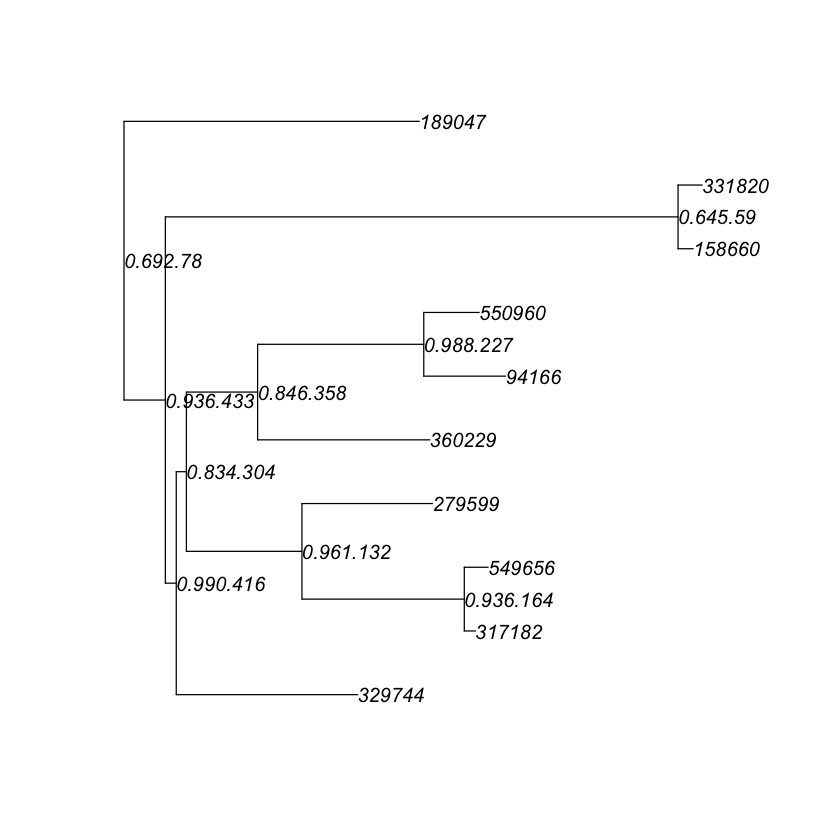

In [3]:
ntaxa(pseq)
nsamples(pseq)
sample_names(pseq)[1:5]
rank_names(pseq)
sample_variables(pseq)
otu_table(pseq)[1:5, 1:5]
tax_table(pseq)[1:5, 1:4]
phy_tree(pseq)
taxa_names(pseq)[1:10]

myTaxa = names(sort(taxa_sums(pseq), decreasing = TRUE)[1:10])
ex1 = prune_taxa(myTaxa, GlobalPatterns)
plot(phy_tree(ex1), show.node.label = TRUE)

##### Preprocessing:  filtering, subsetting, etc.

In [5]:
# Data transformation: relative abundance
GPr  = transform_sample_counts(pseq, function(x) x / sum(x) )
# Filter taxa                              
GPfr = filter_taxa(GPr, function(x) mean(x) > 1e-5, TRUE)
                   
GPfr

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4624 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 7 sample variables ]
tax_table()   Taxonomy Table:    [ 4624 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4624 tips and 4623 internal nodes ]

In [6]:
# Subset taxa
GP.chl = subset_taxa(pseq, Phylum == "Chlamydiae")
# Prune sample
GP.chl = prune_samples(sample_sums(GP.chl) >= 20, GP.chl)

GP.chl

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 21 taxa and 9 samples ]
sample_data() Sample Data:       [ 9 samples by 7 sample variables ]
tax_table()   Taxonomy Table:    [ 21 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 21 tips and 20 internal nodes ]

#### graphic summarym

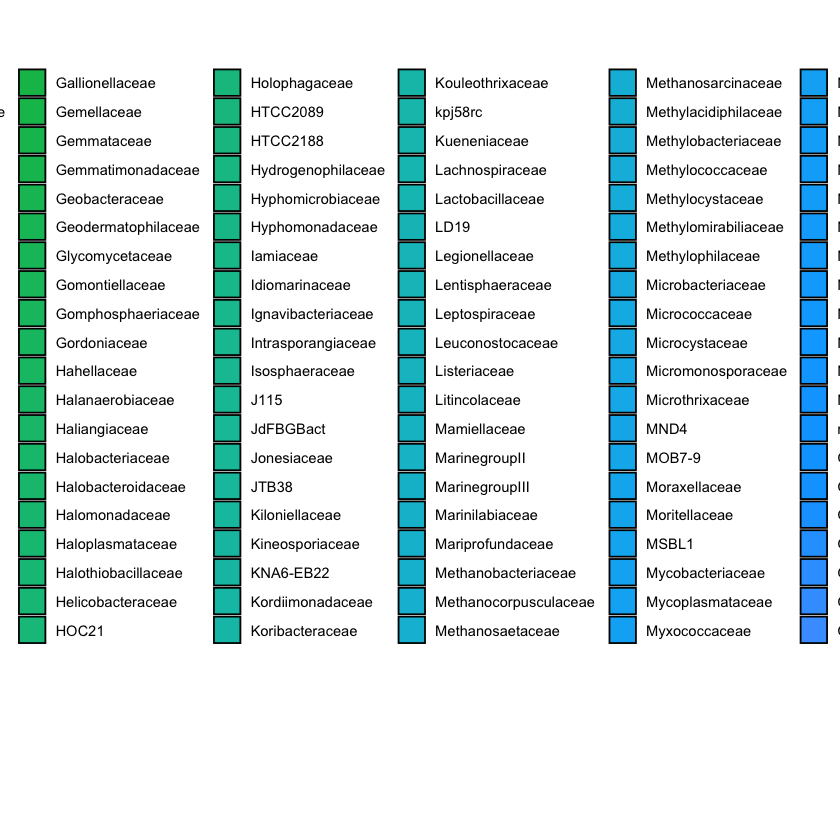

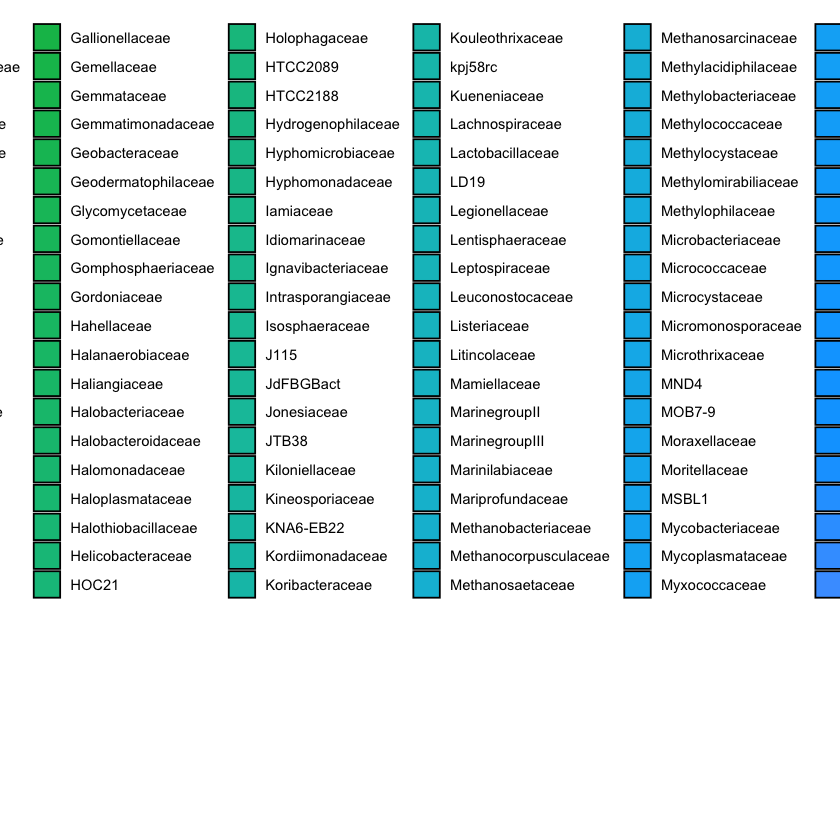

In [16]:
plot_bar(pseq, "SampleType", "Abundance", "Family")

plot_bar(pseq, "Family", "Abundance", "Family", 
         title = title, facet_grid = "SampleType~.")